# Project: Investigate TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Questions for the investigation :

1. Most popular movie in the datset and it's revenue.
2. Top 20 highest budget movies in the dataset.
3. Top 20 movies with highest runtime in the dataset.
4. Check highly correlated variables in the dataset.

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In [2]:
## import the dataset
data = pd.read_csv("tmdb-movies.csv")
data.head() ## top 5 rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
print("Shape of the dataset -", "Rows :",data.shape[0],"Columns",data.shape[1])

Shape of the dataset - Rows : 10866 Columns 21


In [4]:
## columns in the dataset
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
## checking for null values in the dataset
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We can see null values in some columns.

In [6]:
## check for datatypes
data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
## statistical summary
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the above statistical summary we can see that the dataset contains movies from release_year 1960 to 2015 and the maximum runtime of a movie is 900.

### Data Cleaning

In [8]:
## removing unnecessary columns from the dataset
data = data.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview'], axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


In [10]:
# Replacing null values with 'unknown'
data['director'] = data['director'].fillna('Unknown')
data['production_companies'] = data['production_companies'].fillna('Unknown')
data['genres'] = data['genres'].fillna('Unknown')

In [11]:
## replacing 0 with mean
data['budget']=data['budget'].replace(0,data['budget'].mean())
data['revenue']=data['revenue'].replace(0,data['revenue'].mean())
data['budget_adj']=data['budget_adj'].replace(0,data['budget_adj'].mean())
data['revenue_adj']=data['revenue_adj'].replace(0,data['revenue_adj'].mean())

In [12]:
## let's convert release_date from 'object' to 'date'
data['release_date'] = pd.to_datetime(data['release_date'])

In [13]:
## replacing 0 with NaN in runtime
data["runtime"] = data["runtime"].replace(0, np.NaN)

In [14]:
## let's convert budget_adj and revenue_adj from float to int.

data['budget_adj'] = data['budget_adj'].astype(int)
data['revenue_adj'] = data['revenue_adj'].astype(int)

## let's convert budget and revenue from float to int.

data['budget'] = data['budget'].astype(int)
data['revenue'] = data['revenue'].astype(int)

In [15]:
## splitting the 'production_companies' column and removing some data
data['production_companies'] = data['production_companies'].str.split('|').str[0]

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 : Which is the most popular movie in the dataset and revenue of that movie?

In [16]:
pop_movie = data[data["popularity"] == data["popularity"].max()]
print("Most popular movie : ",pop_movie["original_title"][0])
print("Revenue :", pop_movie["revenue"][0])

Most popular movie :  Jurassic World
Revenue : 1513528810


So, the most popular movie in the dataset is Jurassic World with revenue of $1513528810.

### Question 2 : Which are the top 20 movies with highest budget?

In [17]:
Top_20_budget = data.sort_index(by = "budget",ascending = False).head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


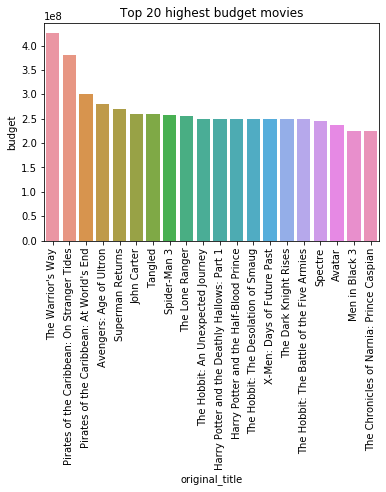

In [18]:
sns.barplot(x = Top_20_budget["original_title"], y = Top_20_budget["budget"])
plt.title("Top 20 highest budget movies")
plot = plt.xticks(rotation=90)

These are the top 20 movies with highest budget in which The Warrior's Way is the biggest budget movie with budget of $425000000.

### Question 3 : Which are the top 20 movies with highest runtime?

In [19]:
Top_20_runtime = data.sort_index(by = "runtime",ascending = False).head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


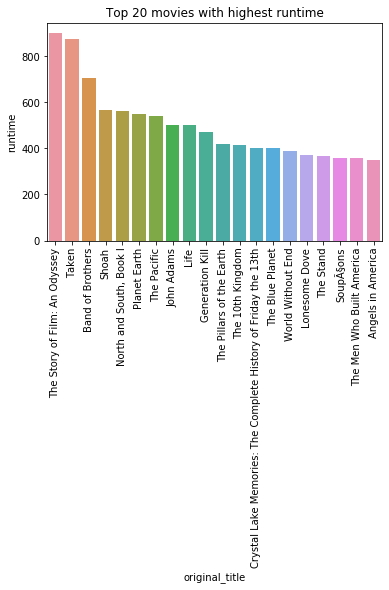

In [20]:
sns.barplot(x = Top_20_runtime["original_title"], y = Top_20_runtime["runtime"])
plt.title("Top 20 movies with highest runtime")
plot = plt.xticks(rotation=90)

These are the top 20 movies with highest runtime in which The Story of Film: An Odyssey is the movie with highest runtime, directed by Mark Cousins.

### Question 4 : Check which variables are highly correlated?

Text(0.5, 1, 'Heatmap : Correlation between variables')

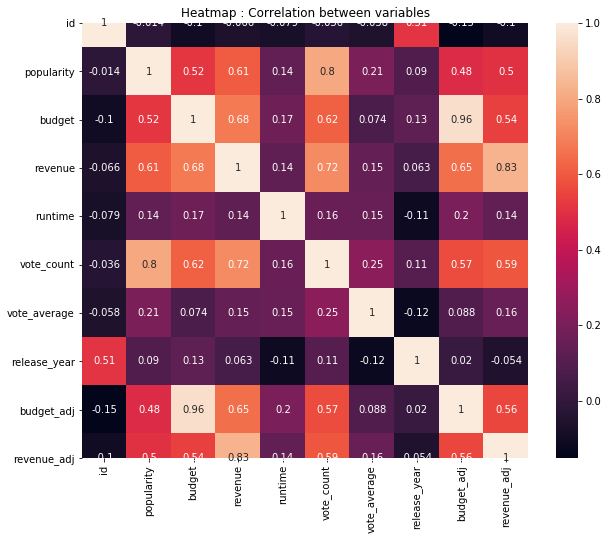

In [21]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True);
plt.title("Heatmap : Correlation between variables")

From the above heatmap the variables which are highly correlared are :

* popularity and budget
* revenue and popularity
* vote_count and popularity
* vote_count and revenue

But we should keep in mind that **correlation does not mean causation**.

### Check for outliers in the budget and revenue columns

Text(0.5, 1.0, 'Boxplot for budget')

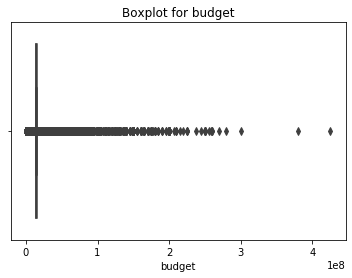

In [22]:
## let's see outliers in budget column
sns.boxplot(data["budget"]);
plt.title("Boxplot for budget")

Text(0.5, 1.0, 'Boxplot for revenue')

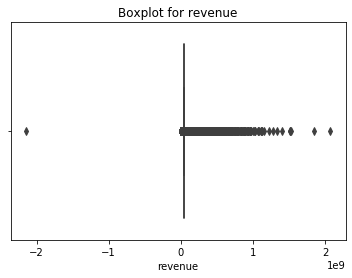

In [23]:
## outliers in revenue column
sns.boxplot(data["revenue"]);
plt.title("Boxplot for revenue")

We can see outliers in both revenue and budget column but there is a negative outlier in revenue column.

### Distribution of average vote

Text(0.5, 1.0, 'Distribution of avg_votes')

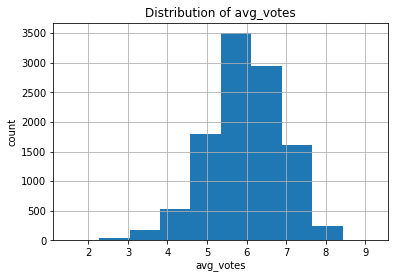

In [24]:
data["vote_average"].hist()
plt.xlabel('avg_votes')
plt.ylabel('count')
plt.title('Distribution of avg_votes')

Highest avg_vote is 5.5 followed by 6.5 and 5.

<a id='conclusions'></a>
## Conclusions

From the above investigation I have got following points:

* The most popular movie in the dataset is **Jurassic World** with revenue of $1513528810.

* **Avtar** movie is the movie which has highest revenue of $2781505847.

* Biggest budget movie in the dataset is **The Warrior's Way** with the budget of $425000000.

* **The Story of Film: An Odyssey** is the movie with highest runtime, directed by **Mark Cousins**.

### Limitation

The limititations of this dataset are :

* The dataset contains movies from release_year 1960 to 2015.

* There are missing values in the dataset.

* In budget and revenue column, some of the values are 0 which can distort the result when we delete or replace these values.

* There would be some other movies also which is not provided in the dataset between 1960 to 2015.

---